Lakukan dan jelaskan clustering pada dataset mall_customer.csv dengan ketentuan dan langkah-langkah sebagai berikut

DATA PREPOCESSING

1. Load dataset dan buang feature yang tidak dibutuhkan serta rapikan dataset

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from matplotlib import pyplot as plt
from itertools import combinations
from sklearn.decomposition import PCA
import seaborn as sns
%matplotlib inline

In [3]:
# load dataset
df = pd.read_csv('../../../../../Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
# buang feature yang tidak diperlukan
df.drop(['CustomerID'], axis=1, inplace=True)

2. Cek tipe data pada masing-masing feature dan encoding bila diperlukan

In [5]:
# cek tipe data dari masing-masing feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [6]:
# melakukan encode pada feature yang berupa string (Genre)
df_encode = df.copy()
df_encode['Genre'] = LabelEncoder().fit_transform(df_encode['Genre'])
df_encode.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


3. Cek data null dan data duplicated

In [7]:
# cek data null
df_encode.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
# cek data duplikat
df_encode.duplicated().sum()

0

4. Handling miss value dan handling duplicated data jika diperlukan

5. Cek data outlier dengan visualisasikan dalam boxplot pada masing-masing feature

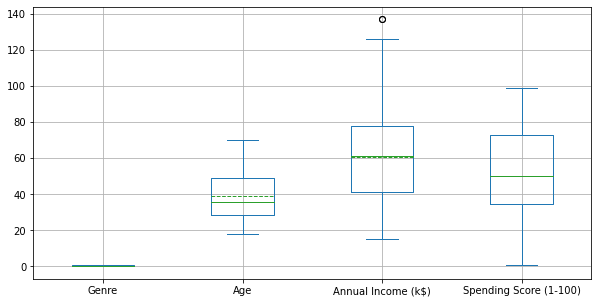

In [9]:
df_boxplot = df_encode.plot.box(figsize=(10,5), showmeans=True, meanline=True, grid=True)

6. Handling outlier jika diperlukan

In [13]:
# handling outliers
qnl = df_encode['Annual Income (k$)'].quantile(0.25)
qnh = df_encode['Annual Income (k$)'].quantile(0.75)
mqr = (qnh - qnl)

In [14]:
df_encode['Annual Income (k$)'] = df_encode['Annual Income (k$)'].mask(df_encode['Annual Income (k$)'] < qnl - 1.5 * mqr, qnl - 1.5 * mqr)
df_encode

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


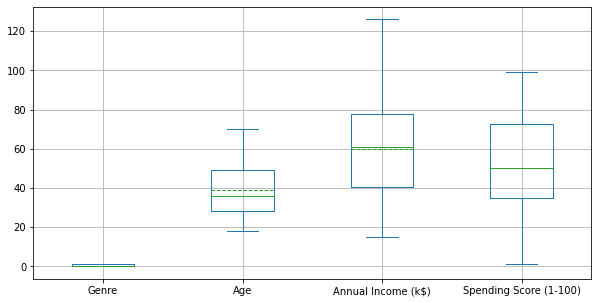

In [15]:
df_new = df_encode.copy()
df_new = df_new[(df_encode['Annual Income (k$)'] > qnl - 1.5 * mqr) & (df_encode['Annual Income (k$)'] < qnh + 1.5 * mqr)]

df_boxplot = df_new.plot.box(figsize=(10,5), showmeans=True, meanline=True, grid=True)

7. Visualisasikan korelasi antar-feature dengan visualisasi heatmap

In [16]:
# corelasi feature
corr = df_new.corr()
corr

,Genre,Age,Annual Income (k$),Spending Score (1-100)
Genre,1.000000,0.067835,0.024384,-0.059092
Age,0.067835,1.000000,0.004406,-0.329421
Annual Income (k$),0.024384,0.004406,1.000000,0.010080
Spending Score (1-100),-0.059092,-0.329421,0.010080,1.000000


<AxesSubplot:>

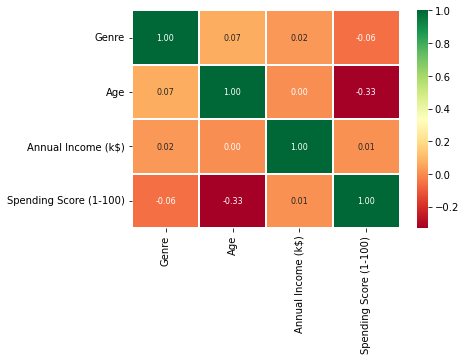

In [17]:
sns.heatmap(corr, annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':8}, fmt='.2f')

8. Normalisasikan data menggunakan normalisasi tertentu (bebas bisa standart atau minmax)


In [18]:
# minmax scaler
scaler = MinMaxScaler()
df_colomn = list(df_new.columns)
scaler.fit(df_new[df_colomn])

df_new_scaled = scaler.transform(df_new)
df_new[df_colomn] = df_new_scaled
df_new

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.009009,0.051020
3,0.0,0.096154,0.009009,0.775510
4,0.0,0.250000,0.018018,0.397959
...,...,...,...,...
193,0.0,0.384615,0.882883,0.918367
194,0.0,0.557692,0.945946,0.153061
195,0.0,0.326923,0.945946,0.795918
196,0.0,0.519231,1.000000,0.275510


9. Tampilkan scatter plot sebelum clustering dengan kombinasi 4 atribut

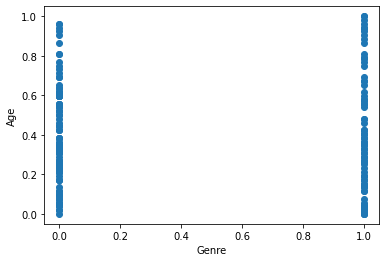

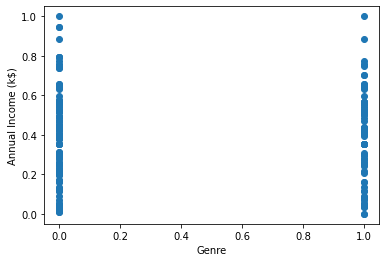

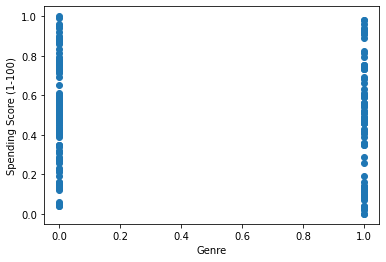

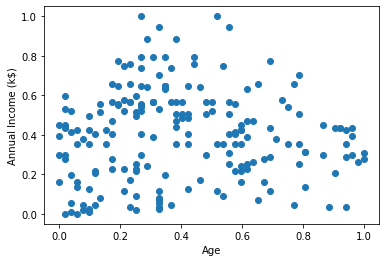

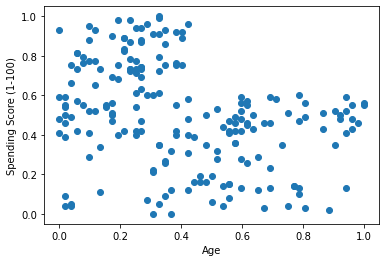

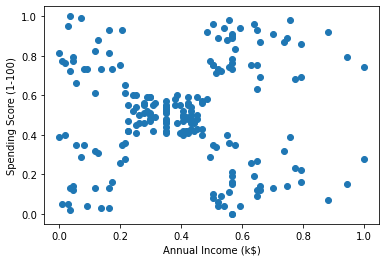

In [19]:
df_new2 = df_new.copy().columns
combins = list(combinations(df_new2, 2))

for x in combins:
    plt.scatter(df_new[x[0]], df_new[x[1]])
    plt.xlabel(x[0])
    plt.ylabel(x[1])
    plt.show()

MODELLING   

10. Clusterlah dataset dengan nilai K 3, 4, 5 dengan atribut 'Annual Income (k$)' dan 'Spending Score (1-100)'

11. Tampilkan scatter plot setelah clustering dengan centroid masing-masing cluster

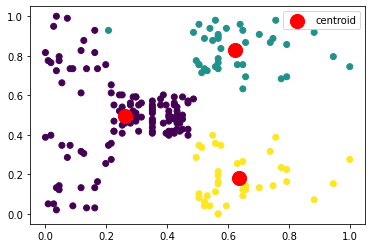

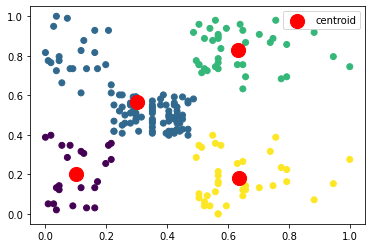

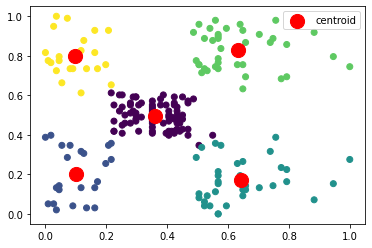

In [20]:
data_model = df_new.copy().copy()
columns = data_model[['Annual Income (k$)', 'Spending Score (1-100)']]

for x in [3,4,5]:
    kmeans = KMeans(n_clusters=x)
    predict = kmeans.fit_predict(columns)
    plt.scatter(columns['Annual Income (k$)'], columns['Spending Score (1-100)'], c=predict)
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=200,label='centroid')
    plt.legend()
    plt.show()

12. Tentukan manakah k terbaik jika dilakukan analisis secara visual

OPTIONAL

13. Lakukan implementasi elbow method untuk mendeteksi K terbaik

C:\Users\Nasrul Wahabi\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


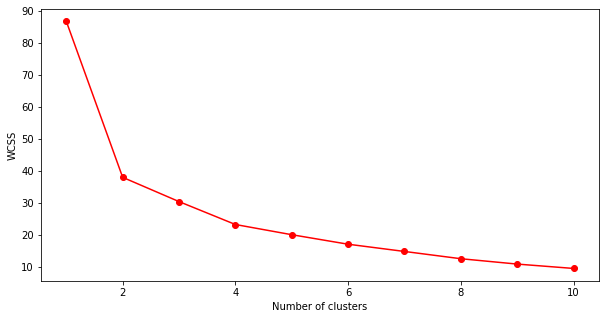

In [21]:
# elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_model)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', color='red')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # within cluster sum of squares
plt.show()

14. Lakukan PCA untuk feature reduction dari seluruh feature menjadi 2 feature

In [22]:
# pca feature reduction
pca = PCA(n_components=2)
pca_data = pd.DataFrame(pca.fit_transform(data_model))
pca_data.columns = ['PC1', 'PC2']
pca_data

,PC1,PC2
0,0.541670,-0.242302
1,0.522245,-0.504644
2,-0.436963,0.076993
3,-0.470229,-0.371847
4,-0.442019,-0.003566
...,...,...
193,-0.448428,-0.266635
194,-0.398732,0.377958
195,-0.444729,-0.226469
196,-0.406419,0.266297


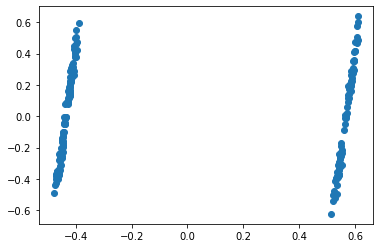

In [23]:
plt.scatter(pca_data['PC1'], pca_data['PC2'])

C:\Users\Nasrul Wahabi\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'WCSS')

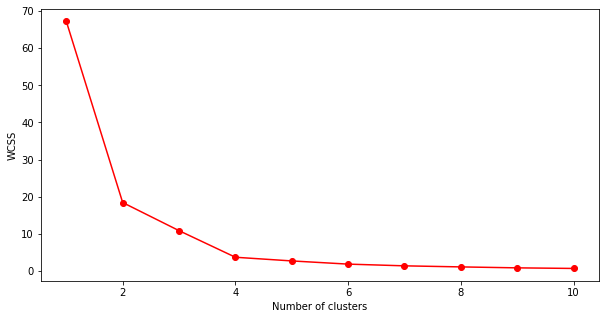

In [24]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', color='red')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # within cluster sum of squares

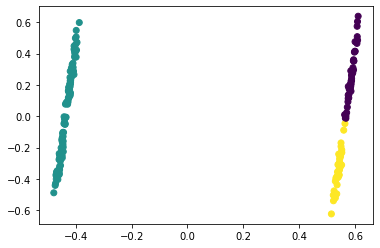

In [25]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
predict = kmeans.fit_predict(pca_data)
plt.scatter(pca_data['PC1'], pca_data['PC2'], c=predict)

15. Lakukan visualisasi 3D scatterplot setelah clustering

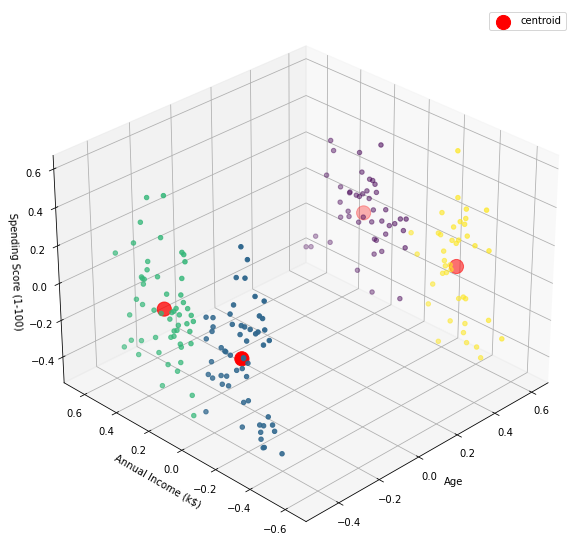

In [26]:
# 3D scatter plot
pca = PCA(n_components=3)
pca_data = pd.DataFrame(pca.fit_transform(data_model))
pca_data.columns = ['PC1', 'PC2', 'PC3']

kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
predict = kmeans.fit_predict(pca_data)

plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')
ax.scatter(pca_data['PC1'], pca_data['PC2'], pca_data['PC3'], c=predict)

centroid = kmeans.cluster_centers_
ax.scatter(centroid[:,0], centroid[:,1], centroid[:,2], c='red', s=200, label='centroid')
ax.view_init(30, 225)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

plt.legend()
